<a href="https://colab.research.google.com/github/kyusvalent/Hamoye-assessment-/blob/main/Hamoye_stage_E_quiz_code_by_kayode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files


uploaded = files.upload()


Saving timeseriesdata.csv to timeseriesdata.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['timeseriesdata.csv']))


In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
## checking for missing values

df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df.shape

(92016, 5)

In [8]:
## convert date to a time series object 
from datetime import datetime

df['FullDate'] = pd.to_datetime(df.FullDate)
df.set_index('FullDate', inplace = True)

In [9]:
#Resampling to daily sampling rates

df_daily = df.resample('D').sum()
print(df_daily.head())

             Tmax    SysLoad  GasPrice  ElecPrice
FullDate                                         
2010-09-01  379.2  41565.380     88.56   2751.700
2010-09-02  369.6  38898.990     88.56    570.810
2010-09-03  439.2  41665.760    106.80    504.975
2010-09-04  328.8  35638.085     81.36    502.275
2010-09-05  357.6  35611.410    106.80    500.555


Text(0.5, 1.0, 'Plot of ElecPrice over time')

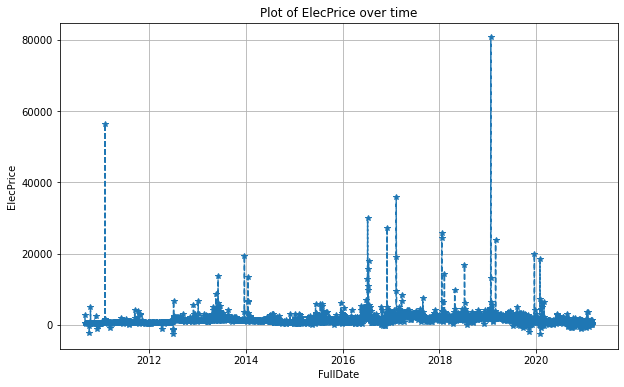

In [10]:
##  Question 11 plot of ElecPrice over time
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')
plt.title('Plot of ElecPrice over time')

In [11]:
train_data = df_daily.iloc[:2757,:] #indexing the first 2757 rows of our data as train set


In [12]:
test_data = df_daily.iloc[2757:,:] # the last rows i.e 1077 rows are indexed as the test set

In [13]:
from fbprophet import Prophet

In [14]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [15]:
df_train = train_data[['FullDate','ElecPrice']]
df_train.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [18]:
df_tests = test_data[['FullDate','ElecPrice']]
df_tests.head()

,FullDate,ElecPrice
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [19]:
df_tests = df_tests.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_tests.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [20]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,252.036148,4752.859946,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,293.503714,5174.094555,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,257.529782,5018.522708,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,57.772361,4945.029983,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-25.751203,4591.720088,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


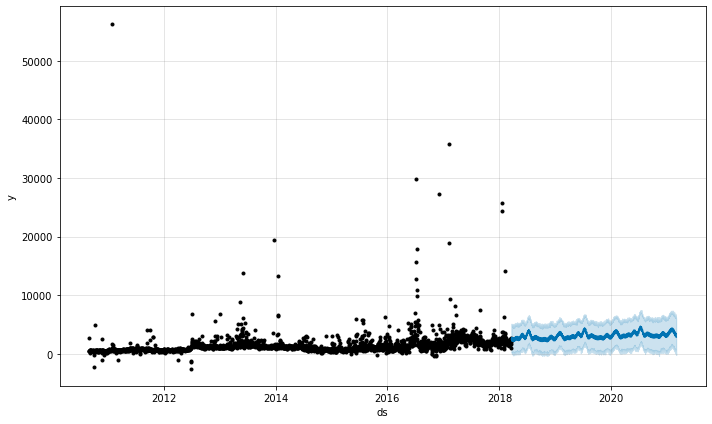

In [22]:
model.plot(forecast)
plt.show()

In [23]:
from sklearn import metrics

In [24]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [25]:
## question 14
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

the Mean Average Percentage Error ( MAPE) is: 549.48


In [26]:
# question 15 RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,2)

3218.16

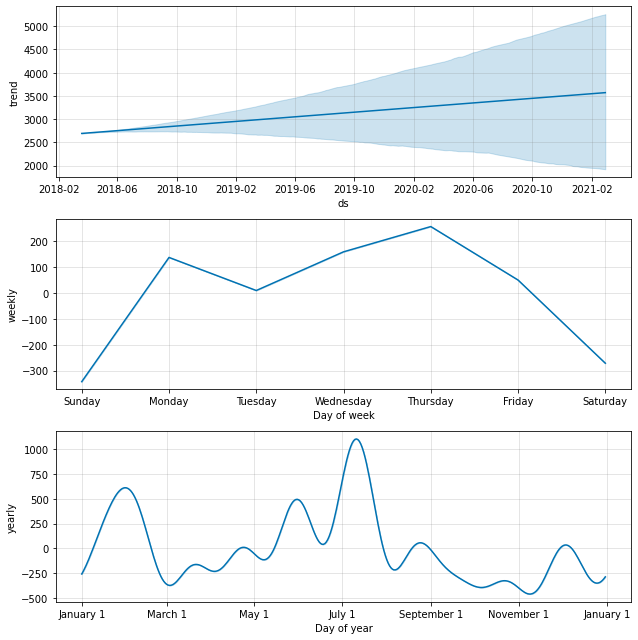

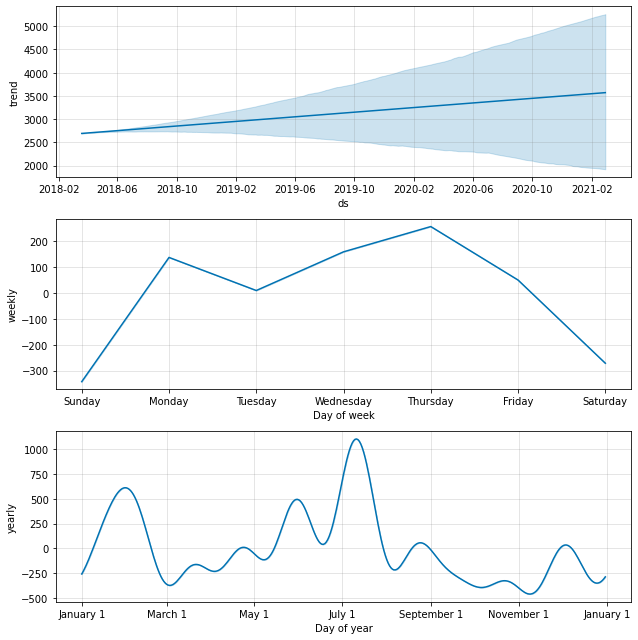

In [27]:
## question 16: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

model.plot_components(forecast)

In [28]:
df_daily.reset_index(inplace=True)

In [29]:
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [30]:
df_daily2 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'GasPrice':'add3','SysLoad':'add1',
                                           'Tmax':'add2'})

In [31]:

train2 = df_daily2.iloc[:2757,:]
test2 = df_daily2.iloc[2757:,:]
print(test2.shape)
print(train2.shape)

(1077, 5)
(2757, 5)


In [32]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [34]:
#fitting the model to train data
model = model.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
#making prediction with test set
prediction = model.predict(test2)

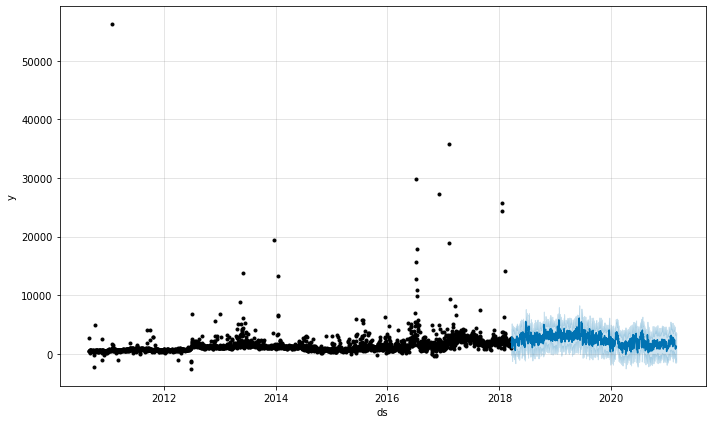

In [36]:
model.plot(prediction)
plt.show()

In [37]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [39]:
## question 17:Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
MAPE = Metric(test2['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:233.74


In [40]:
# question 18: RMSE
RMSE = np.sqrt(metrics.mean_squared_error(test2['y'],prediction['yhat']))
RMSE
round(RMSE,2)

2709.65

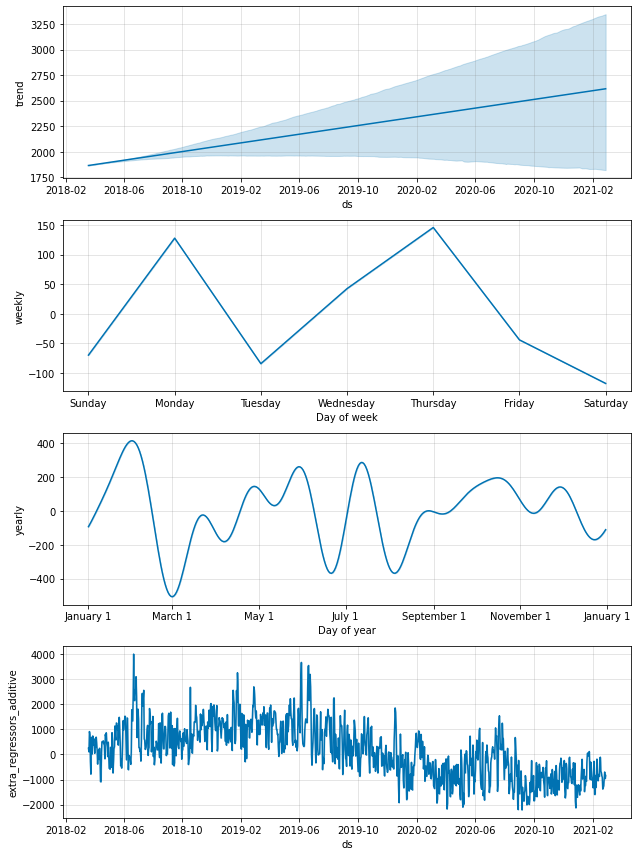

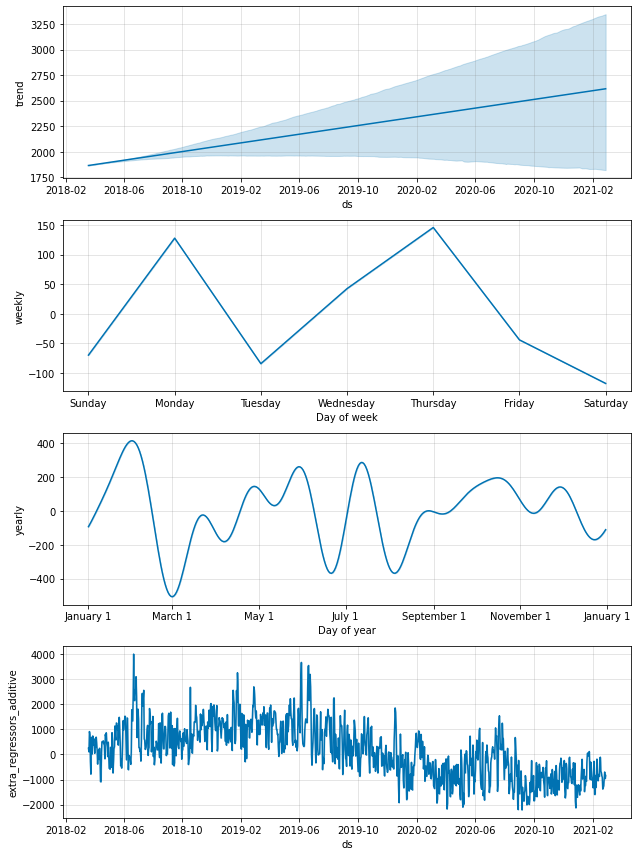

In [41]:
# question 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

model.plot_components(prediction)

In [42]:
df_daily3 = df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'GasPrice':'add3','SysLoad':'add1'})

In [45]:
train3 = df_daily3.iloc[:2757,:]
test3 = df_daily3.iloc[2757:,:]
print(test3.shape)
print(train3.shape)

(1077, 5)
(2757, 5)


In [46]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')

In [47]:
#fitting the model to train data
model = model.fit(train3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
#making prediction with test set
prediction = model.predict(test3)

In [49]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [50]:
## question 20:Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?
MAPE = Metric(test3['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:236.66
